In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as mp
import math


In [3]:
# read the data file and transfer into DataFrame

# with pd.option_context('display.precision', 10):
    # df = pd.read_csv("NGSIM__Lankershim_Vehicle_Trajectories.csv", float_precision = 'high')
    # print(df.Global_Time)
    

raw_data = pd.read_csv('NGSIM__Lankershim_Vehicle_Trajectories.csv')
raw_df = pd.DataFrame(raw_data)
raw_df

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,63,3,394,1118935680200,44.589,67.404,6451974.592,1872844.458,14.2,7.0,...,205,1,0,2,3,0,0,0.0,0.0,lankershim
1,63,4,394,1118935680300,44.589,67.404,6451974.592,1872844.458,14.2,7.0,...,205,1,0,2,3,0,0,0.0,0.0,lankershim
2,63,5,394,1118935680400,44.624,67.904,6451974.815,1872844.906,14.2,7.0,...,205,1,0,2,3,0,0,0.0,0.0,lankershim
3,63,6,394,1118935680500,44.659,68.402,6451975.037,1872845.354,14.2,7.0,...,205,1,0,2,3,0,0,0.0,0.0,lankershim
4,63,7,394,1118935680600,44.140,69.129,6451974.835,1872846.224,14.2,7.0,...,205,1,0,2,3,0,0,0.0,0.0,lankershim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607314,1603,5510,178,1118937250900,42.529,1273.409,6452476.070,1873947.779,15.2,7.2,...,206,0,4,1,2,0,0,0.0,0.0,lankershim
1607315,1603,5511,178,1118937251000,44.436,1272.763,6452477.624,1873946.615,15.2,7.2,...,206,0,4,1,2,0,0,0.0,0.0,lankershim
1607316,1603,5512,178,1118937251100,46.627,1271.907,6452479.506,1873944.983,15.2,7.2,...,206,0,4,1,2,0,0,0.0,0.0,lankershim
1607317,1603,5513,178,1118937251200,48.079,1270.967,6452480.602,1873943.645,15.2,7.2,...,206,0,4,1,2,0,0,0.0,0.0,lankershim


In [4]:
# select intersection: 1234(5?)
# Direction: 1E2N3W4S
# Movement: 1TH, 2LT, 3RT

intID = 2
Movement = 1
Direction = 1

df = raw_df.loc[(raw_df['Int_ID'] == intID)]
df = df.loc[df['Movement'] == Movement]
nV = len(set(df.Vehicle_ID))
print('The total volume number is ' + str(nV))           # number of vehicles under certain sircumstance

The total volume number is 1112


In [5]:
# Time stamp process

# sort and pre-normalize the global time
df.Global_Time = (df.Global_Time - min(df['Global_Time']))/1000 # changed unit to seconds # (ten frames per second)
# len(df.Global_Time)

# plot the Global_Time
# number = np.arange(0,len(df))
# mp.plot(number, df.Global_Time)
# print(max(df.Global_Time)) # time spans

# set the timestamp
time_df = df[['Vehicle_ID', 'Global_Time']] # Select only the two columns from complete dataframe


stp_df = pd.DataFrame(columns=['TimeStamp','Volume'])
for i in range(math.ceil(max(df.Global_Time)/10)):
    temp_df = time_df.loc[(df['Global_Time'] >= i * 10) & (df['Global_Time'] <= (i+1) * 10)]
    temp_n = len(set(temp_df.Vehicle_ID))
    data={'TimeStamp':[i],'Volume':[temp_n]}
    new_row = pd.DataFrame(data)
    stp_df = pd.concat([stp_df,new_row],ignore_index=True)    
    i = i + 1
else:
    print("Finish loop")


Finish loop


In [6]:
# Cut the last time stamp for lacking sufficient time
stp_df = stp_df.iloc[:-1 , :]
stp_df

,TimeStamp,Volume
0,0,5
1,1,2
2,2,4
3,3,0
4,4,0
...,...,...
194,194,3
195,195,3
196,196,4
197,197,9


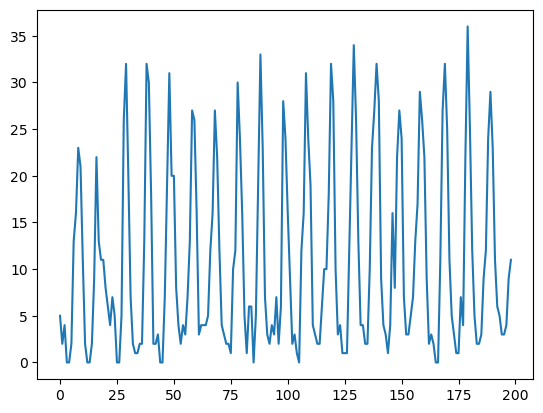

In [7]:
# visualize the volume
mp.plot(stp_df.TimeStamp, stp_df.Volume)

In [8]:
# Learning
